<a target="_blank" href="https://colab.research.google.com/github/aalonsopuig/RL_AAPGAG/blob/main/estudio_montecarlo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [17]:
!curl -O https://raw.githubusercontent.com/aalonsopuig/RL_AAPGAG/refs/heads/main/src/FrozenAgent.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26577  100 26577    0     0  80692      0 --:--:-- --:--:-- --:--:-- 82027


In [18]:
from __future__ import annotations
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import gymnasium as gym
import FrozenAgent
import random
import time

semilla=100

Cargamos el entorno

In [19]:


print("definimos el entorno:")
name = 'FrozenLake-v1'
env4 = gym.make(name, is_slippery=False, map_name="4x4", render_mode="ansi") # No resbaladizo para entender mejor los resultados.
env8 = gym.make(name, is_slippery=False, map_name="8x8", render_mode="ansi") # No resbaladizo para entender mejor los resultados.


definimos el entorno:


Función útil para establecer la semilla tanto en numpy como en la librería random

In [20]:

def setSemilla(semilla):
    random.seed(semilla)
    np.random.seed(semilla)


Algorimto genérico de para evaluar un agente

In [21]:

def train_agent(agent, env, num_episodes=5000, decay=False, semilla=1):
    #inicializamos el agente
    agent.initAgent()
    for episode in tqdm(range(num_episodes)):
        state, info = env.reset(seed=semilla)
        done = False
    
        #inicializo el episodio
        agent.initEpisode()
    
        # play one episode
        while not done:
            if decay:
                agent.decay_epsilon()
            action = agent.get_action(env, state)
            
            next_state, reward, terminated, truncated, info = env.step(action)

            # update the agent
            agent.updateStep(state, action, reward, terminated, next_state)
            
            # update if the environment is done and the current state
            done = terminated or truncated
            state = next_state
            
        #después de acabar el episodio actualizo la Q y el epsilon
        agent.updateEpisode()


Muestra los resultados recogidos por el agente durante su entrenamiento. Esta función muestra dos indicadores que implementan todos los agentes: 
* proporción de recompensas: suma recompensas / episodios
* proporción de tamaño de episodios: suma len(episodio) / episodios

In [22]:


def plot2(agent1,agent2,num):
  # Creamos una lista de índices para el eje x
  indices1 = list(range(len(agent1.list_stats)))
  indices2 = list(range(len(agent2.list_stats)))
    
  # Crear figura con dos subgráficos
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

  # Primer subplot
  ax1.plot(indices1[:num], agent1.list_stats[:num], label=agent1)
  ax1.plot(indices2[:num], agent2.list_stats[:num], label=agent2)
  ax1.set_title('Proporción de recompensas')
  ax1.set_xlabel('Episodio')
  ax1.set_ylabel('Proporción')
  ax1.legend()
  ax1.grid(True)

  # Segundo subplot
  ax2.plot(indices1[:num], agent1.list_episodes[:num], label=agent1)
  ax2.plot(indices2[:num], agent2.list_episodes[:num], label=agent2)
  ax2.set_title('Tamaño de episodios')
  ax2.set_xlabel('Episodio')
  ax2.set_ylabel('Tamaño')
  ax2.legend()
  ax2.grid(True)

  # Primer subplot
  ax3.plot(indices1, agent1.list_stats, label=agent1)
  ax3.plot(indices2, agent2.list_stats, label=agent2)
  ax3.set_title('Proporción de recompensas')
  ax3.set_xlabel('Episodio')
  ax3.set_ylabel('Proporción')
  ax3.legend()
  ax3.grid(True)

  # Segundo subplot
  ax4.plot(indices1, agent1.list_episodes, label=agent1)
  ax4.plot(indices2, agent2.list_episodes, label=agent2)
  ax4.set_title('Tamaño de episodios')
  ax4.set_xlabel('Episodio')
  ax4.set_ylabel('Tamaño')
  ax4.legend()
  ax4.grid(True)

  # Ajustar diseño y mostrar gráfico
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()  



Definimos dos agentes: MC on policy all visits y first visit.

Ejecutamos en entrenameiento y obtenemos la mejor política de cada uno

In [23]:


#inicializo los numeros aleatorios
setSemilla(semilla)

# hyperparameters
n_episodes = 5000
start_epsilon = 0.1
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentMC_On_All(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
agent2 = FrozenAgent.FrozenAgentMC_On_First(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
train_agent(agent1, env4, num_episodes=n_episodes, decay=False, semilla=semilla)
train_agent(agent2, env4, num_episodes=n_episodes, decay=False, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env4, agent1.Q)
pi2, actions2 = agent2.pi_star_from_Q(env4, agent2.Q)


100%|██████████| 5000/5000 [00:02<00:00, 1964.22it/s]


Mostramos resultados

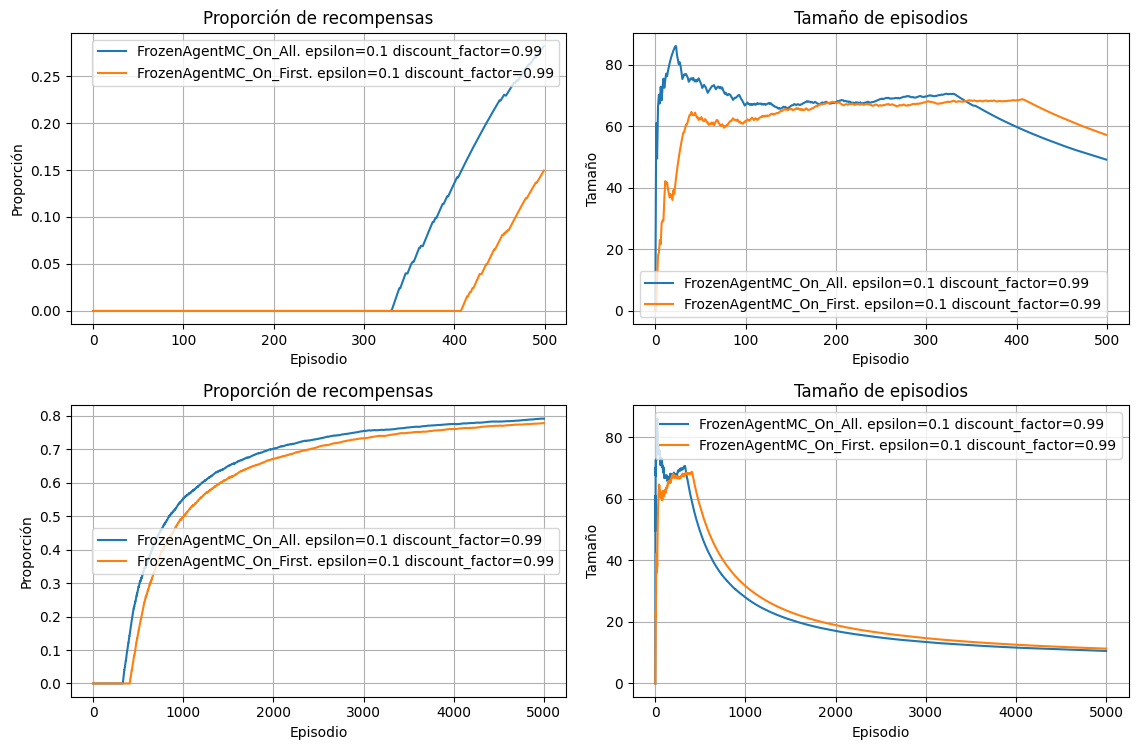

In [24]:
plot2(agent1,agent2,500)


Aparentemente puede parece una mejor que la otra, pero repitiendo el experimento con otros valores de semilla se puede observar que la elección de la semilla inlfuye en el resultado

In [25]:
#inicializo los numeros aleatorios
setSemilla(10)

# hyperparameters
n_episodes = 5000
start_epsilon = 0.1
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentMC_On_All(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
agent2 = FrozenAgent.FrozenAgentMC_On_First(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
train_agent(agent1, env4, num_episodes=n_episodes, decay=False, semilla=semilla)
train_agent(agent2, env4, num_episodes=n_episodes, decay=False, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env4, agent1.Q)
pi2, actions2 = agent2.pi_star_from_Q(env4, agent2.Q)

100%|██████████| 5000/5000 [00:02<00:00, 2112.36it/s]


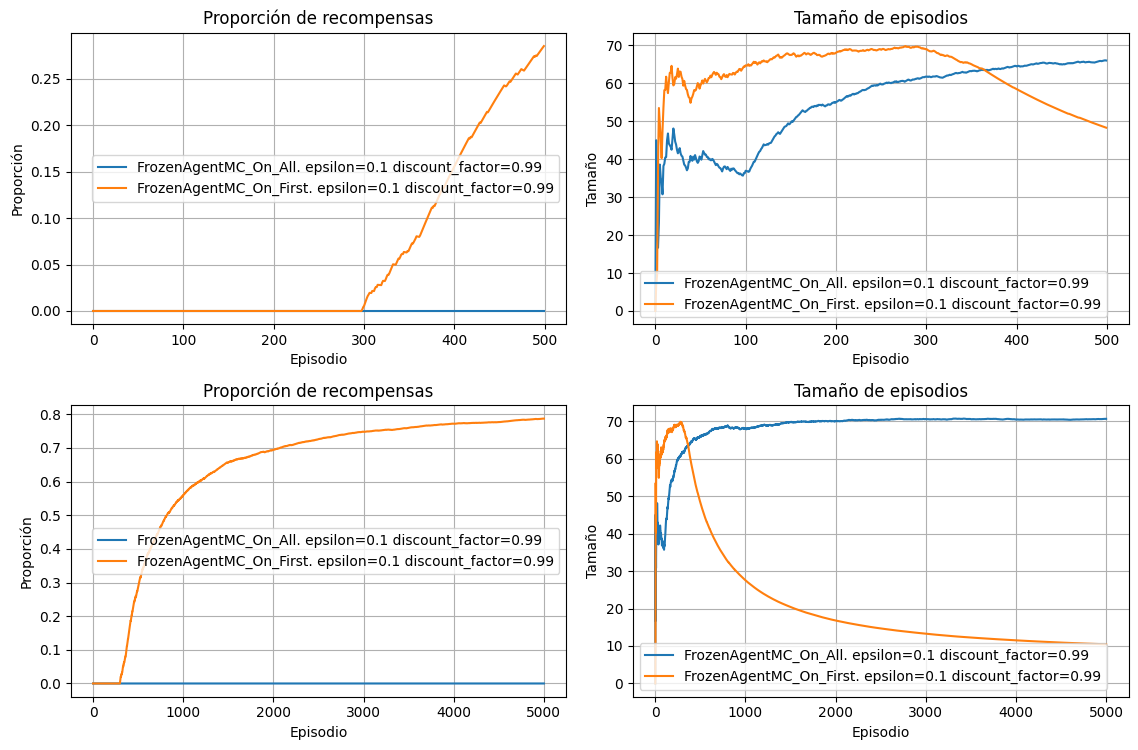

In [26]:
plot2(agent1,agent2,500)

Analizando detenidamente el código, se observa que la semilla se debe inicializar antes de cada entrenamiento del agente.

In [27]:
#inicializo los numeros aleatorios
setSemilla(semilla)

# hyperparameters
n_episodes = 5000
start_epsilon = 0.1
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentMC_On_All(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
agent2 = FrozenAgent.FrozenAgentMC_On_First(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)

#inicializo los numeros aleatorios
setSemilla(semilla)
train_agent(agent1, env4, num_episodes=n_episodes, decay=False, semilla=semilla)
#inicializo los numeros aleatorios
setSemilla(semilla)
train_agent(agent2, env4, num_episodes=n_episodes, decay=False, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env4, agent1.Q)
pi2, actions2 = agent2.pi_star_from_Q(env4, agent2.Q)

100%|██████████| 5000/5000 [00:02<00:00, 2046.39it/s]


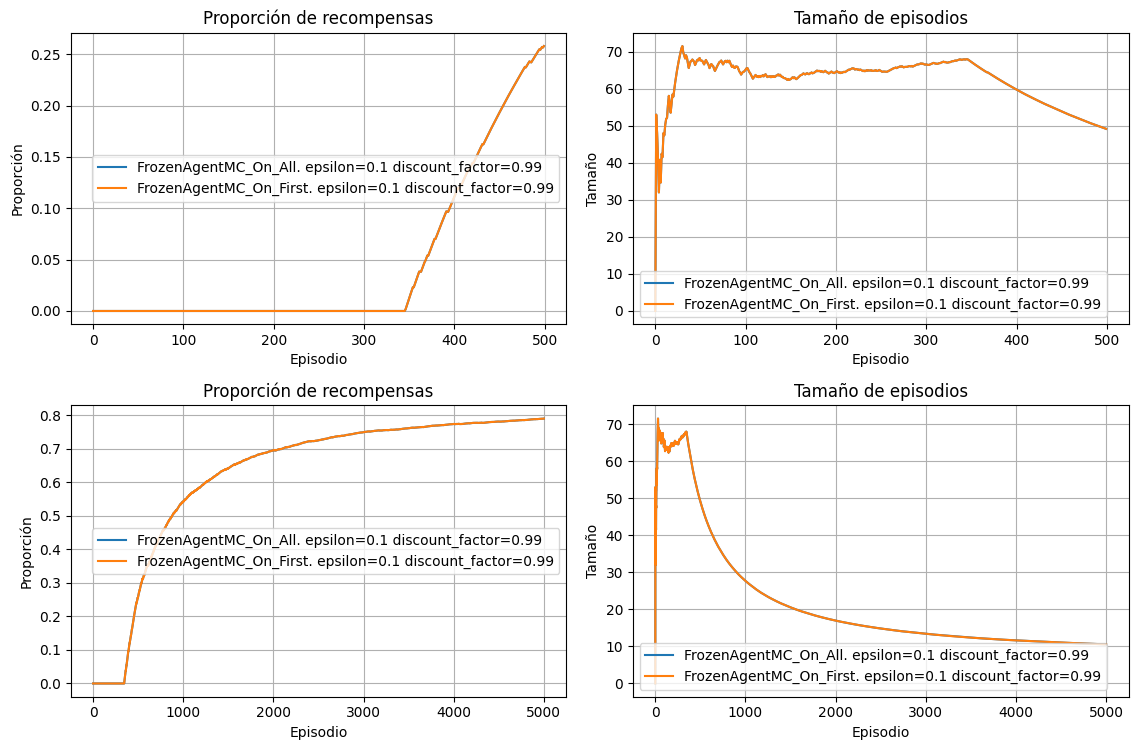

In [28]:
plot2(agent1,agent2,500)

Se puede observar que las dos gráficas son idénticas, lo cual nos hace pensar que los dos algoritmos producen la misma proporción de recompensas (en igualdad de condiciones).

Esto es debido a que ambos algoritmos implementan la misma política ( epsilon soft greedy ) y que ambos actualizan la política al menos una vez por cada par estado-acción. El MC Primera visita sólo actualiza la política una vez y el MC Todas las visitas la actualiza todas las veces. La media acumulada por recorrer todas las visitas está muy próxima a las recompensas acumuladas en la primera visita, así que la actualización de la política tiene los mismos efectos en ambos algoritmos

Por lo tanto cabe esperar que la única diferencia entre estos dos algoritmos sea al valor de la Q

In [29]:

print(f"================== AGENTE 1 {agent1}")
print(f"Máxima proporcion: {agent1.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent1.Q)
print("Política óptima obtenida\n", pi1, f"\n Acciones {actions1} \n Para el siguiente grid\n", env4.render())
print()

print(f"================== AGENTE 2 {agent2}")
print(f"Máxima proporcion: {agent2.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent2.Q)
print("Política óptima obtenida\n", pi2, f"\n Acciones {actions2} \n Para el siguiente grid\n", env4.render())
print()



================== AGENTE 1 FrozenAgentMC_On_All. epsilon=0.1 discount_factor=0.99
Máxima proporcion: 0.7905034547681191
Valores Q para cada estado:
 [[ 0.0075327   0.78871059  0.1896245   0.20842592]
 [ 0.20519676  0.          0.          0.09320653]
 [-0.18949583  0.          0.          0.        ]
 [-0.58359505  0.          0.67272081 -0.10441114]
 [ 0.0275924   0.85659756  0.          0.41767096]
 [ 1.61898166  1.54160517 -0.25187914 -0.84243574]
 [ 0.          0.          0.          0.        ]
 [-0.32623806  0.05567601  0.22239961 -1.443217  ]
 [ 0.05135871  0.          0.90308918  0.55067637]
 [ 0.62513624  0.94789519  0.84338081  0.        ]
 [ 0.970299    0.98874352  0.          0.        ]
 [ 1.29974807 -1.73309562 -0.9833101   0.35750775]
 [-1.6135785   1.47071387 -1.1880176  -0.54974619]
 [ 0.          0.9008244   0.98347689  0.90328557]
 [ 0.94706603  0.9764304   1.          0.83680385]
 [-0.88179839  0.01863895  0.23784462  0.01354855]]
Política óptima obtenida
 [[0. 1.

Efctivamente se puede comprobar, que la Q obtenida en ambos algoritmos son diferentes, pero la política óptima resultante es idéntica, por lo que eso explica que ambos hubieran generado los mismos episodios y por ello la misma gráfica de proporción de recompensas

Ahora vamos a probar con el mapa de 8x8 para ver si con episodios más largos ambos algoritmos muestran el mismo comportamiento.

En este caso se pone el parámetro decay a true para que vaya explorando menos conforme pasan los episodios y converja antes.

In [30]:
#inicializo los numeros aleatorios
setSemilla(11)

# hyperparameters
n_episodes = 5000
start_epsilon = 0.1
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentMC_On_All(
    env=env8,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
agent2 = FrozenAgent.FrozenAgentMC_On_First(
    env=env8,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)

#inicializo los numeros aleatorios
setSemilla(semilla)
train_agent(agent1, env8, num_episodes=n_episodes, decay=True, semilla=semilla)
#inicializo los numeros aleatorios
setSemilla(semilla)
train_agent(agent2, env8, num_episodes=n_episodes, decay=True, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env8, agent1.Q)
pi2, actions2 = agent2.pi_star_from_Q(env8, agent2.Q)

100%|██████████| 5000/5000 [00:05<00:00, 916.88it/s] 


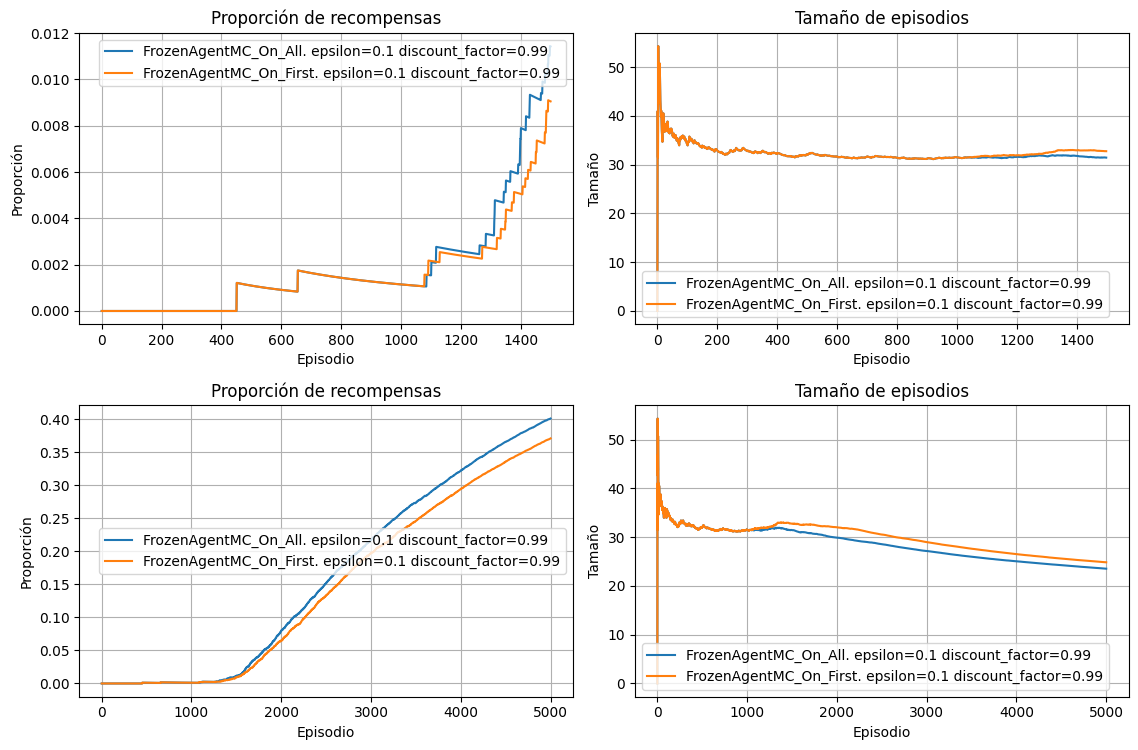

In [31]:
plot2(agent1,agent2,1500)

Se observan pequeñas diferencias en las ganancias obtenidas, esto es debido a que la cantidad de ganancias acumuladas por cada par estado-acción es mayor en MC todas las visitas que en MC priemra visita, por lo que es más probable que las dos medias sean diferentes y provoquen algún cambio en las políticas resultantes.

Se comprueba los valores de Q y de la política óptima y esta vez sí que se observan diferencias en la política resultante, por lo que se espera que a,bos algoritmos generen episodios diferentes.

In [32]:
print(f"================== AGENTE 1 {agent1}")
print(f"Máxima proporcion: {agent1.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent1.Q)
print("Política óptima obtenida\n", pi1, f"\n Acciones {actions1} \n Para el siguiente grid\n", env8.render())
print()

print(f"================== AGENTE 2 {agent2}")
print(f"Máxima proporcion: {agent2.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent2.Q)
print("Política óptima obtenida\n", pi2, f"\n Acciones {actions2} \n Para el siguiente grid\n", env8.render())
print()

================== AGENTE 1 FrozenAgentMC_On_All. epsilon=0.1 discount_factor=0.99
Máxima proporcion: 0.4009765892995832
Valores Q para cada estado:
 [[ 0.10783142  0.09162467  0.38863293  0.09611394]
 [ 0.14723282  0.13452696  0.4392598   0.14147835]
 [ 0.1913669   0.14998044  0.49027109  0.16764243]
 [ 0.24914943  0.2503628   0.52721991  0.26482572]
 [ 0.27728608  0.55394051  0.3132409   0.27714189]
 [ 0.19624516  0.4769847   0.21413525  0.22857162]
 [ 0.39782175  0.17644407  0.22728113  0.15666565]
 [ 0.22809767  0.30745959  0.24344449  0.48314875]
 [ 0.03017381  0.02638982  0.13586686  0.02897443]
 [ 0.05292453  0.05761154  0.23137047  0.06413973]
 [ 0.09217438  0.05947804  0.30926607  0.1017957 ]
 [ 0.18025221  0.          0.46167086  0.2016689 ]
 [ 0.3372305   0.29164024  0.59555475  0.35225135]
 [ 0.39408844  0.36468305  0.63423364  0.38457528]
 [ 0.43799826  0.64917866  0.46182056  0.42013663]
 [ 0.25035091  0.57045601  0.27098799  0.27856918]
 [ 0.15273286  0.02318594  0.02589

## Conclusión
Se ha realizado varias pruebas con diferentes semillas y en todas ellas se observa que MC All visits converge un poco antes que MC First.